# Tasks

- Task 1  [10 Points]: Work with Mnist dataset
    - Perform proper preprocessing and visualization
    - Perform proper hyperparameter tuning **-SVM-**. JUSTIFY ALL THE HYPERPARAMETER VALUES


:* Task 2 (Bouns) [3 Points] : Follow [this tutorial](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn) on **Naive Bayes** and apply what you learnt on the [Spam Classification dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from keras.datasets import mnist
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [ ]:
#the dataset exists in many places; sklearn, keras, and online with different qualities,
#so make sure to check the size first
digits = datasets.load_digits()
#or uncomment the following to use keras data
#(X_train, y_train), (X_test, y_test) = mnist.load_data()


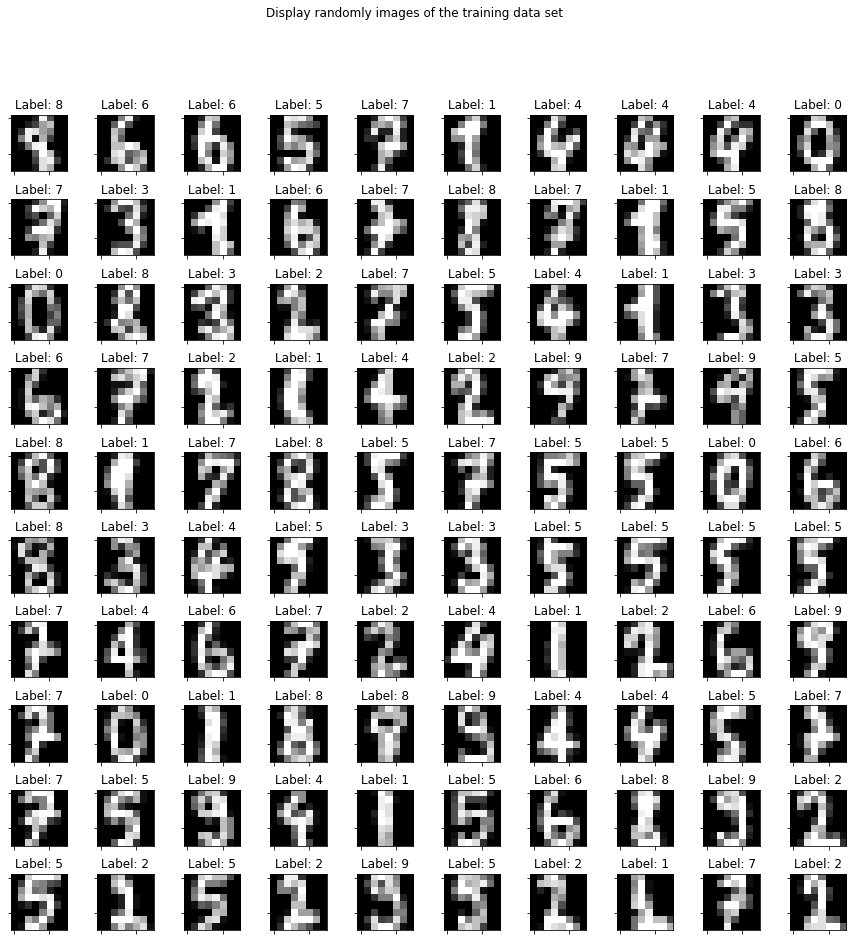

In [ ]:
# A helper display function

# check the reshape line, adjust it if needed for your image size
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(8,8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(digits.images,digits.target) 

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# preprocessing
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/Datasets/mnist_train.csv', encoding="ISO-8859-1")
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("\n Shape of the dataset:", data.shape)



 Shape of the dataset: (60000, 785)


In [ ]:
# Analysing the pixels intensity values 
subset_pixels = data.iloc[:, 1:]
subset_pixels.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


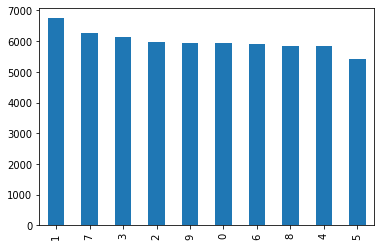

In [ ]:
#Distribution of the digits in the dataset
_ = data['label'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# Visualization Part
print('Shape of training data :', x_train.shape)
print('Shape of training labels :', x_train.shape)
print('Shape of testing data :', x_train.shape)
print('Shape of testing labels :', x_train.shape)


Shape of training data : (60000, 28, 28)
Shape of training labels : (60000, 28, 28)
Shape of testing data : (60000, 28, 28)
Shape of testing labels : (60000, 28, 28)


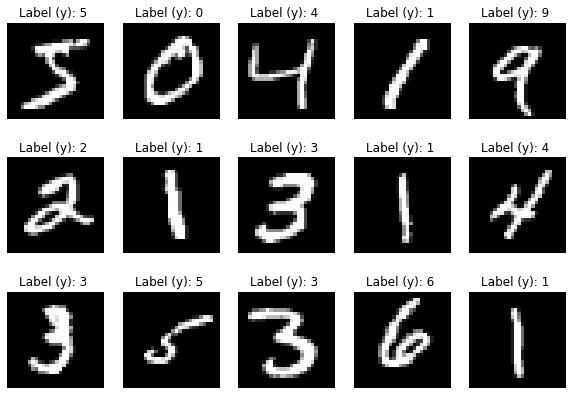

In [ ]:
# Plotting
fig = plt.figure(figsize=(10,7))
for i in range(15):
  ax = fig.add_subplot(3,5,i+1)
  ax.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  ax.set_title('Label (y): {y} '.format(y=y_train[i]) )
  plt.axis('off')

In [ ]:
# Flatten each image into a vector of length 784
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# Normalizing
x_train = x_train/255
x_test = x_test/255

print('Shape of training data after reshaping: ', x_train.shape)
print('Shape of testing data after reshaping: ', x_test.shape)


Shape of training data after reshaping:  (60000, 784)
Shape of testing data after reshaping:  (10000, 784)


In [ ]:
# Considering the first 6000 image in training data and first 2000 images in testing data
x_train = x_train[0:6000,:]
y_train = y_train[0:6000]
x_test = x_train[0:2000,:]
y_test = y_test[0:2000]

print('Shape of training data: ', x_train.shape)
print('Shape of training labels: ', y_train.shape)
print('Shape of testing data: ', x_test.shape)
print('Shape of testing labels: ', y_test.shape)




Shape of training data:  (6000, 784)
Shape of training labels:  (6000,)
Shape of testing data:  (2000, 784)
Shape of testing labels:  (2000,)


In [ ]:
# Using default hyperparameters
svc = SVC() 
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy score for default parameters:')
print(metrics.accuracy_score(y_test,y_pred))


Accuracy score for default parameters:
0.098


In [ ]:
# Running SVM with different Kernels to know which kernel accurancy is better
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score Linear:')
print(metrics.accuracy_score(y_test,y_pred))
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score RBF:')
print(metrics.accuracy_score(y_test,y_pred))
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score Polynomial:') 
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score Linear:
0.0985
Accuracy Score RBF:
0.098
Accuracy Score Polynomial:
0.0975


In [ ]:
# Since polynomial kernel performed poorly, linear and RBF will be considered
# 1) CV for Linear Kernel
svc = SVC(kernel='linear')
scores = cross_val_score(svc, x_train, y_train, cv=10, scoring='accuracy') 
print('Scores of linear Kernel:',scores)
print('Score Mean of linear Kernel:',scores.mean())

Scores of linear Kernel: [0.89833333 0.89333333 0.91833333 0.93       0.92333333 0.92666667
 0.91166667 0.92       0.905      0.91166667]
Score Mean of linear Kernel: 0.9138333333333334


[0.9146666666666666, 0.9113333333333333, 0.9093333333333333, 0.9081666666666666, 0.9068333333333334, 0.906, 0.9053333333333333, 0.9055, 0.9055]


Text(0, 0.5, 'Cross-Validated Accuracy')

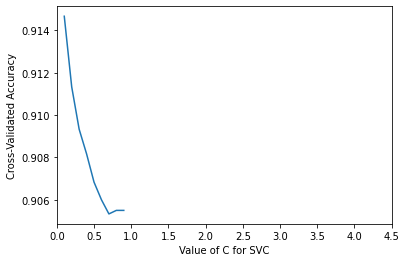

In [ ]:
# Checking C hyperparameter for the linear kernel
C_range=list(np.arange(0.1,1,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x_train, y_train, cv=2, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xticks(np.arange(0,5,0.5))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

**Plot explanation: The accuracy has been close to 91.4% for C=1 and then it drops and remains constant.**


In [ ]:
# 2) CV for RBF Kernel
svc = SVC(kernel='rbf')
scores = cross_val_score(svc, x_train, y_train, cv=10, scoring='accuracy') #cv is cross validation
print('Scores of RBF Kernel:', scores)
print('Score Mean of RBF Kernel:', scores.mean())

Scores of RBF Kernel: [0.95       0.93166667 0.95666667 0.95833333 0.95666667 0.96333333
 0.96333333 0.95833333 0.95       0.95166667]
Score Mean of RBF Kernel: 0.954


[0.647, 0.8916666666666666, 0.9386666666666668, 0.8021666666666667, 0.11199999999999999, 0.11183333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

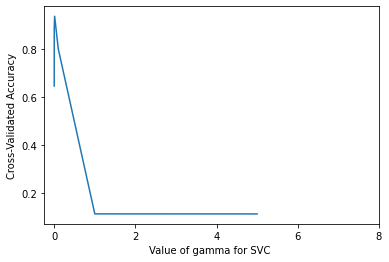

In [ ]:
# Checking gamma hyperparameter for the RBF kernel
gamma_range=[0.0001,0.001,0.01,0.1,1,5]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, x_train, y_train, cv=2, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,10,2))
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
### Grid Search
tuned_parameters = {
    'C':  (np.arange(0.1,1,0.1)),
        'gamma':[0.0001,0.001,0.01,0.1,1,5],
    
     "kernel":[ 'rbf', 'linear']

}
svm_model= SVC()

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)
print(model_svm.best_score_)
print(model_svm.best_params_)

0.9484999999999999
0.9484999999999999
{'C': 0.9, 'gamma': 0.01, 'kernel': 'rbf'}


**The Grid Search function shows that the RBF kernel is better than the linear kernel, it is not efficient as it takes a very long time to run.**

**Bonus Task:**

In [ ]:
#Load dataset
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/My Drive/Datasets/spam.csv', encoding="ISO-8859-1")
df.rename(columns = {'v1':'class_label', 'v2':'message'}, inplace = True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df.head()

Mounted at /content/drive/


,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df['class_label'].value_counts()


ham     4825
spam     747
Name: class_label, dtype: int64

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
classLabel_encoded=le.fit_transform(df.loc[:,"class_label"])
print (classLabel_encoded)

[0 0 1 ... 0 0 0]


In [ ]:
# Converting string labels into numbers
message_encoded=le.fit_transform(df.loc[:,"message"])
print ('Message:',message_encoded)


Message: [1079 3101 1000 ... 3286 3901 3409]


In [ ]:
#Combinig weather and temp into single listof tuples
features = zip(classLabel_encoded,message_encoded)
array = np.arange(8)
reshape_feature = array.reshape(-1,1)
print (features)
print (reshape_feature)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]


In [ ]:
# Splitting data
X = df["class_label"]
y = df["message"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

cv = CountVectorizer(min_df = 0.01, max_features = 300, stop_words = 'english') #1% / 300 occurences 
cv.fit(X_train)

X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

In [ ]:
# Creating model
model = MultinomialNB()
model.fit(X_train, y_train)

print('The Score of the Model: ', model.score(X_test, y_test))

The Score of the Model:  0.004307250538406317


In [ ]:
# Predicting Model
y_test_pred = model.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Testing Model
def classifier(message):
    
    transformed = cv.transform([message])
    prediction =  model.predict(transformed)
    
    if prediction == "ham":
        return "This message is no spam!"
    else:
        return "This message is spam!"
    
classifier("Free entry in 2 a wkly comp to win FA Cup fina...")

'This message is spam!'